In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
pd.__version__

'1.3.4'

**This is the description of the dataset that will be use**

In [3]:
description = pd.read_csv('DescriptionDataCoSupplyChain.csv')

# set the maximum column width and the maximum number of items to display to None
# also set the text alignment for the header annd the data
pd.set_option("max_colwidth", None); pd.set_option("max_seq_items", None)
description.style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]},
                                    {'selector': 'td', 'props': [('text-align', 'left')]}])

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased product
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer
5,Delivery Status,": Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time"
6,Late_delivery_risk,": Categorical variable that indicates if sending is late (1), it is not late (0)."
7,Category Id,: Product category code
8,Category Name,: Description of the product category
9,Customer City,: City where the customer made the purchase


In [4]:
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='latin-1', error_bad_lines=False)
pd.set_option('max_columns', None)
df.head()

C:\Users\Dewi M\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# 1. Data Cleaning and Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
#counting percentage of null value
df.isna().sum()/len(df)*100

Type                               0.000000
Days for shipping (real)           0.000000
Days for shipment (scheduled)      0.000000
Benefit per order                  0.000000
Sales per customer                 0.000000
Delivery Status                    0.000000
Late_delivery_risk                 0.000000
Category Id                        0.000000
Category Name                      0.000000
Customer City                      0.000000
Customer Country                   0.000000
Customer Email                     0.000000
Customer Fname                     0.000000
Customer Id                        0.000000
Customer Lname                     0.004432
Customer Password                  0.000000
Customer Segment                   0.000000
Customer State                     0.000000
Customer Street                    0.000000
Customer Zipcode                   0.001662
Department Id                      0.000000
Department Name                    0.000000
Latitude                        

In [7]:
df.duplicated().sum()
#no data duplicated

0

In [8]:
#there are several columns that should not be an object so, we'll fix it
df[['order date (DateOrders)', 'shipping date (DateOrders)']] = df[
    ['order date (DateOrders)', 'shipping date (DateOrders)']].astype('datetime64')

In [9]:
#seems like there are several column that is not representative, so we'll delete it
df = df.drop(columns=['Customer Email', 'Customer Country', 'Customer Password', 'Product Image', 'Product Description'])

In [10]:
#merge the first and last name
df['Customer Full Name'] = df['Customer Fname'] + ' ' + df['Customer Lname']

In [11]:
#then decide to delete it and use the fullname instead
df = df.drop(columns=['Customer Fname','Customer Lname'])

### Date

In [12]:
#I want to know which year, month, day have the most booking/shipping
df['Order Year'] = df['order date (DateOrders)'].dt.year
df['Shipping Year'] = df['shipping date (DateOrders)'].dt.year
df['Order Month'] = df['order date (DateOrders)'].dt.month
df['Shipping Month'] = df['shipping date (DateOrders)'].dt.month
df['Order Day'] = df['order date (DateOrders)'].dt.day
df['Shipping Day'] = df['shipping date (DateOrders)'].dt.day
df['Order Hour'] = df['order date (DateOrders)'].dt.hour

In [13]:
#turn the column into str format
df[['Order Year', 'Shipping Year','Order Month', 'Shipping Month', 
    'Order Day', 'Shipping Day', 'Order Hour']] = df[['Order Year', 'Shipping Year','Order Month', 'Shipping Month', 
                                                    'Order Day', 'Shipping Day', 'Order Hour']].astype('str')

In [14]:
date = df[['Order Year', 'Shipping Year', 'Order Month', 'Shipping Month','Order Day', 'Shipping Day', 'Order Hour']]

for col in date.columns:
    print(f'{col} ({date[col].nunique()})')
    print(date[col].value_counts())
    print('\n')

Order Year (4)
2015    62650
2016    62550
2017    53196
2018     2123
Name: Order Year, dtype: int64


Shipping Year (4)
2016    62602
2015    62002
2017    53546
2018     2369
Name: Shipping Year, dtype: int64


Order Month (12)
1     17979
5     15976
7     15922
3     15919
8     15912
9     15489
4     15435
6     15139
2     14529
10    12955
12    12764
11    12500
Name: Order Month, dtype: int64


Shipping Month (12)
1     17404
7     15954
3     15886
5     15843
8     15789
9     15539
4     15451
6     15282
2     14831
10    13293
12    12771
11    12476
Name: Shipping Month, dtype: int64


Order Day (31)
3     6060
1     6050
2     6023
25    6018
21    6004
18    5999
7     5990
22    5979
11    5973
16    5969
26    5964
19    5954
28    5949
9     5936
20    5934
13    5923
6     5917
12    5896
17    5889
27    5868
5     5853
23    5841
14    5837
4     5837
24    5822
15    5815
8     5794
10    5774
30    5616
29    5584
31    3451
Name: Order Day, dtype: int64


Sh

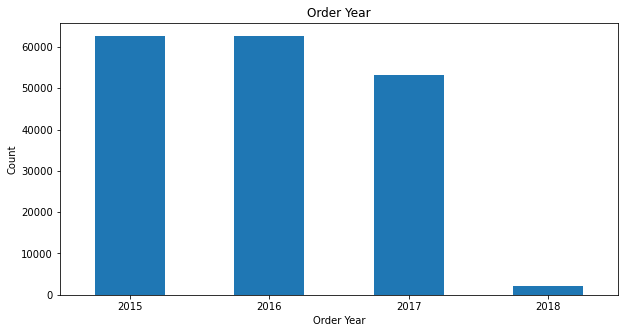

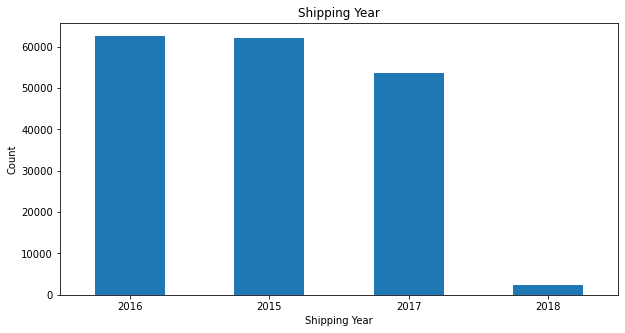

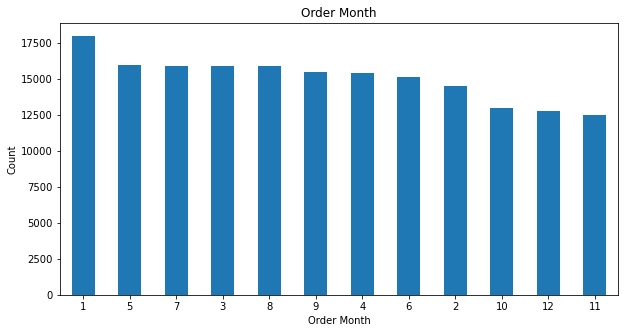

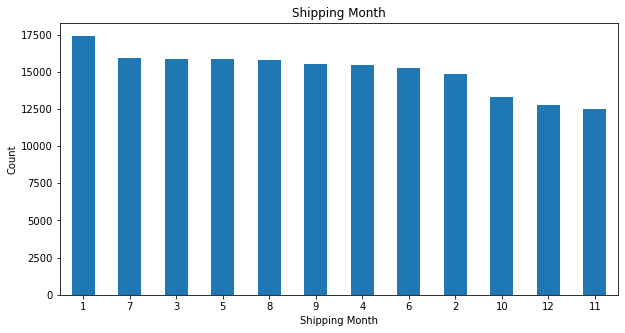

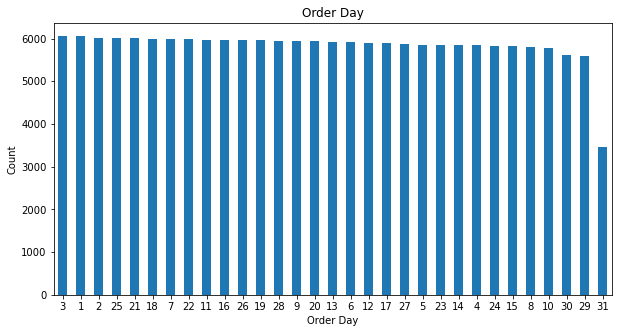

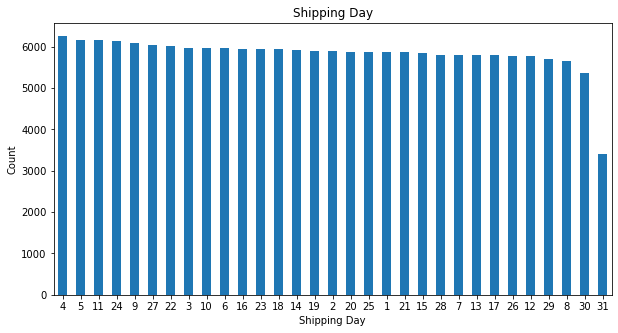

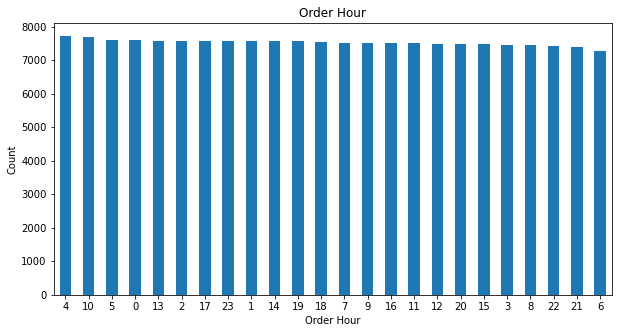

In [15]:
 for col in date:
    counts = date[col].value_counts()
    ax = counts.plot(kind='bar', figsize=(10, 5))
    ax.set_title(col)
    ax.set_xticklabels(counts.index, rotation=0)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    plt.show()

<AxesSubplot:xlabel='Order Hour', ylabel='count'>

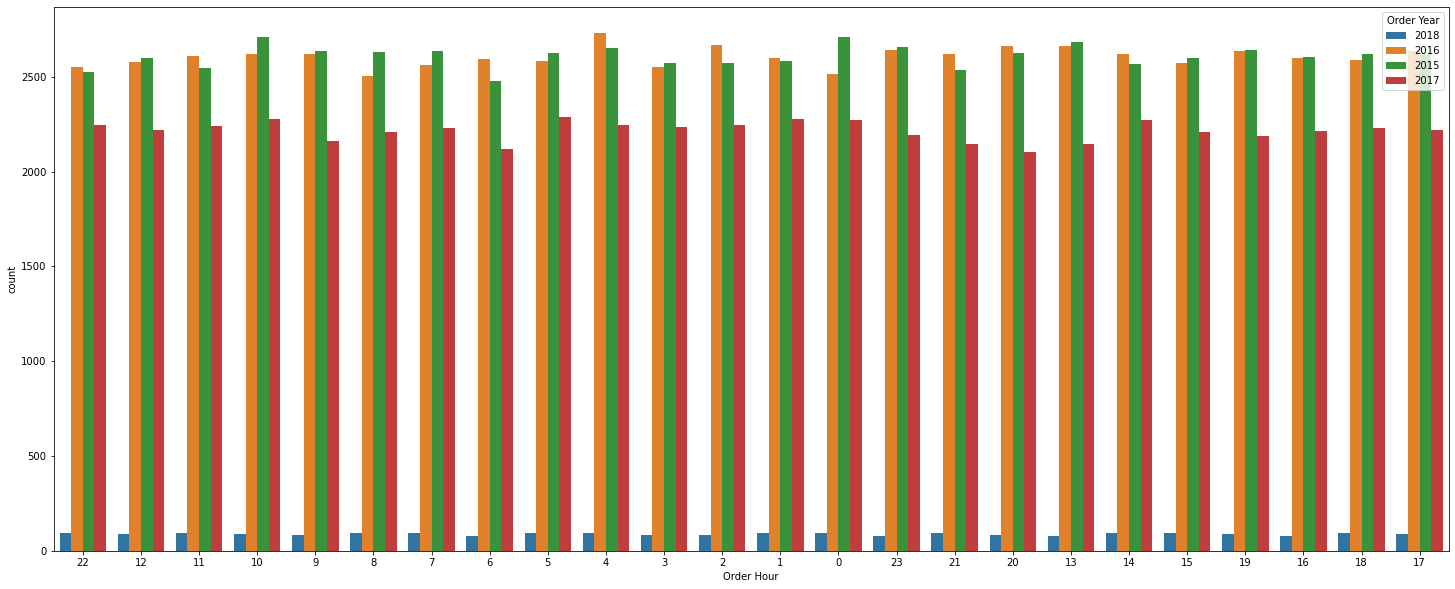

In [16]:
plt.figure(figsize=(25,10))
sns.countplot(data=df, x='Order Hour', hue='Order Year')

In [17]:
for col in df[['order date (DateOrders)', 'shipping date (DateOrders)']]:
    print(f'Maximum {col} ({df[col].max()})')
    print(f'Minimum {col} ({df[col].min()})')
    print('\n')

Maximum order date (DateOrders) (2018-01-31 23:38:00)
Minimum order date (DateOrders) (2015-01-01 00:00:00)


Maximum shipping date (DateOrders) (2018-02-06 22:14:00)
Minimum shipping date (DateOrders) (2015-01-03 00:00:00)




In [33]:
#there's something strange in 2018 data, knowing that it only untill Order Date 'January'
#it biased the monthly data that became most in 'Janury', let see if we removed 2018 data, what happen with the monthly data
df = df[df['order date (DateOrders)'] < '2018-01-01 00:00:00'].reset_index(drop=True)

In [21]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['Order Quarter'] = df['order date (DateOrders)'].dt.quarter

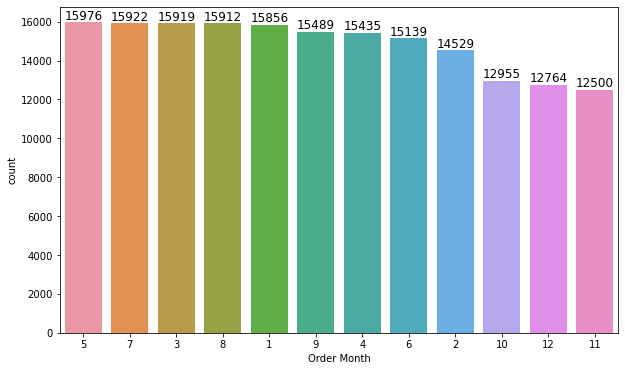

In [22]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='Order Month', order=df['Order Month'].value_counts().index)
ax.bar_label(ax.containers[0], fontsize=12)
plt.show()

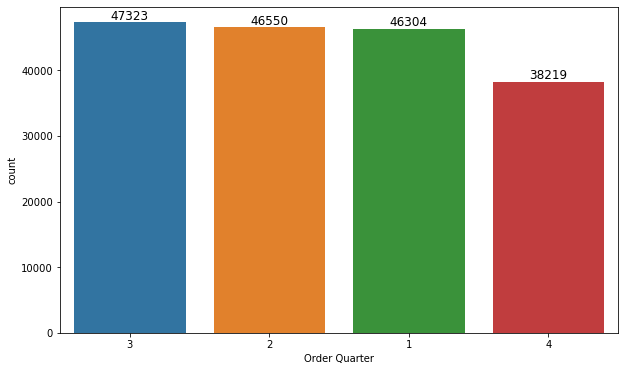

In [23]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='Order Quarter', order=df['Order Quarter'].value_counts().index)
ax.bar_label(ax.containers[0], fontsize=12)
plt.show()

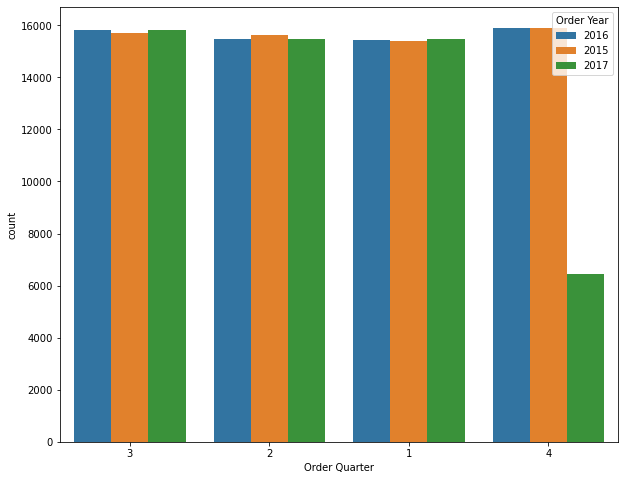

In [24]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df, x='Order Quarter', hue='Order Year', order=df['Order Quarter'].value_counts().index)
plt.show()

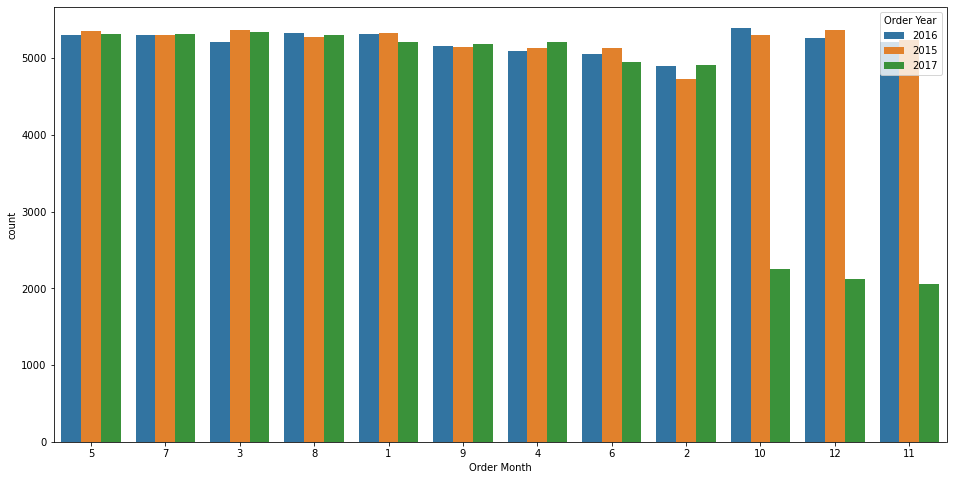

In [25]:
plt.figure(figsize=(16,8))
ax = sns.countplot(data=df, x='Order Month', hue='Order Year', order=df['Order Month'].value_counts().index)
plt.show()

So then, we know that **January** not the month with the higest order, instead its **May**

**To summarize:**
- The year with the highest number of orders was 2015. It makes sense that 2018 had the least number of orders, as the dataset only includes data up until January.
- Over the years, the trend has been declining, so it would be worth reviewing the company's operations to understand why this is happening.
- When looking at the data by month, January appears to have the highest number of orders. However, the data is imbalanced due to the inclusion of 2018, so I removed that year to get a clearer picture of the monthly trends. It appears that May is the month with the most orders.
- When analyzing the data by quarter, we can see that Q4 generally has lower orders. However, when we break the data down by year, we see that the decline in orders in Q4 2017 is what caused this trend.
- On a daily basis, the number of orders remains stagnant. This is likely due to the fact that not all months have 30 or 31 days, which explains why there are fewer orders on the 30th and 31st.
- There does not appear to be any current trends when analyzing the data by hour, as the distribution of orders is fairly balanced.

### Objects

In [26]:
#get the value counts of all column with dtypes 'object'
for col in df.select_dtypes('object').columns:
    print(f'{col} ({df[col].nunique()})')
    print(df[col].value_counts())
    print('\n')

Type (4)
DEBIT       68463
TRANSFER    49318
PAYMENT     41246
CASH        19369
Name: Type, dtype: int64


Delivery Status (4)
Late delivery        97782
Advance shipping     41124
Shipping on time     31822
Shipping canceled     7668
Name: Delivery Status, dtype: int64


Category Name (50)
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Children's Clothing       652
Baseball & Softball       632
Hockey                    614
Cameras                   592
Golf Shoes                524
Crafts                    484
DVDs                      476
Computers                 442
Golf Apparel     

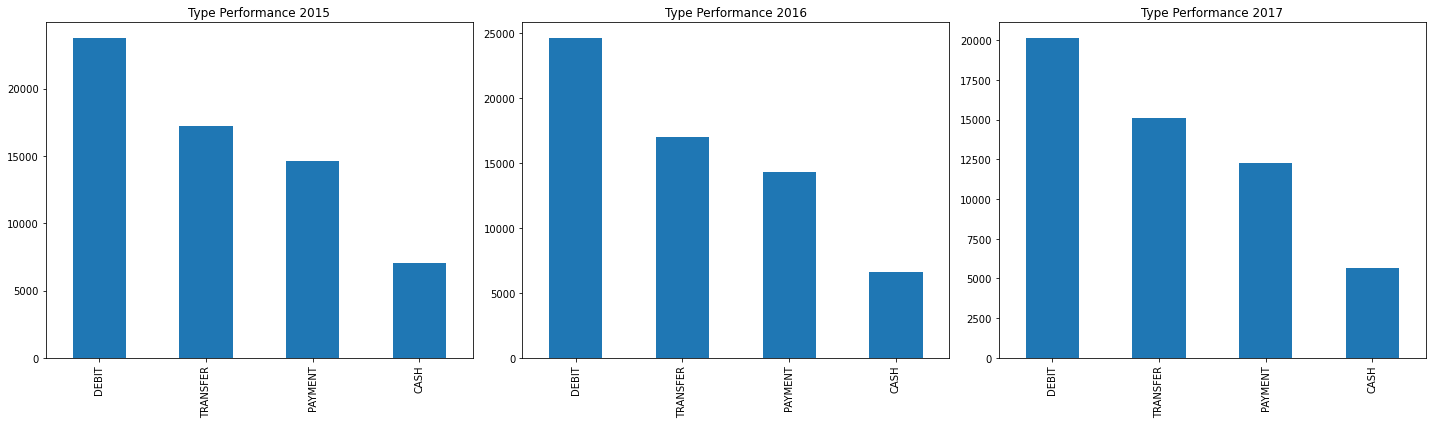

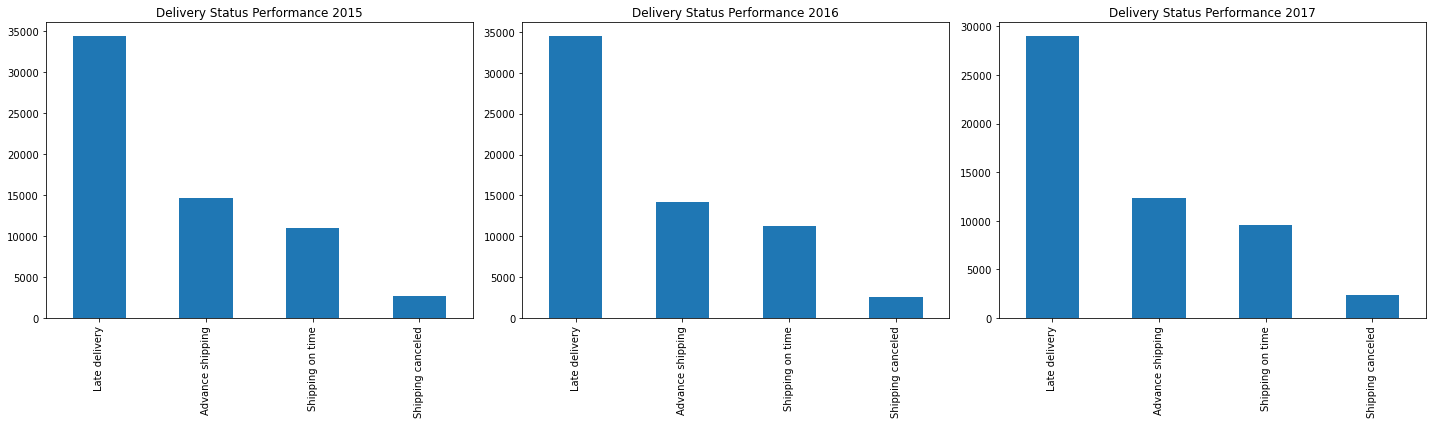

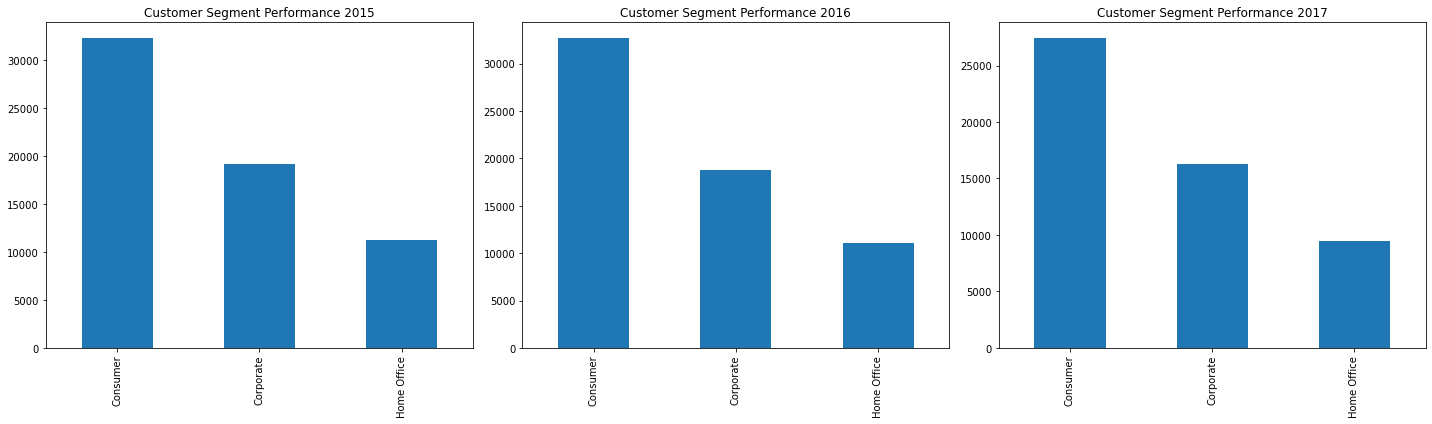

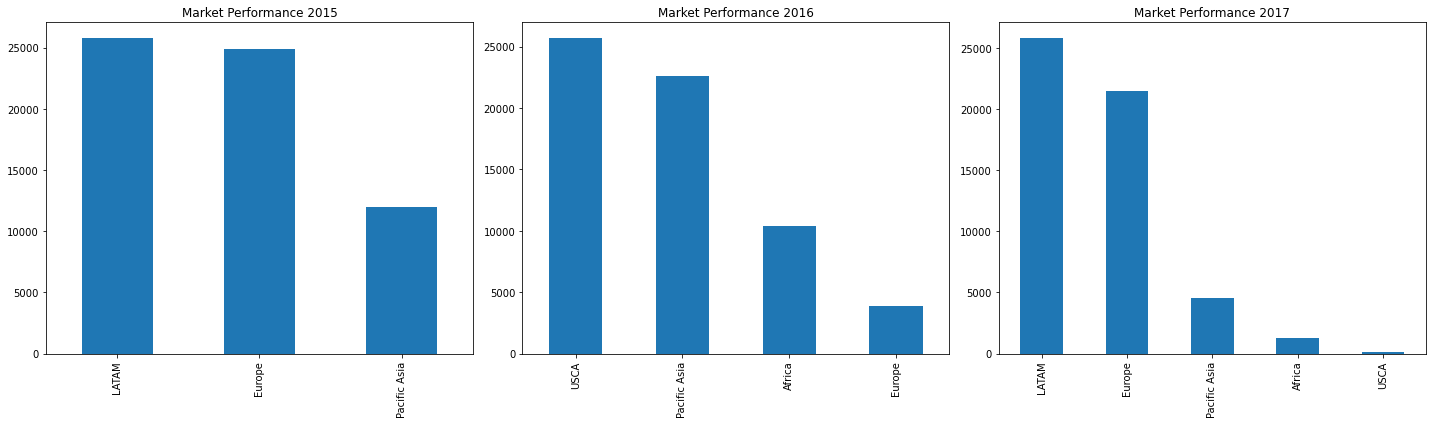

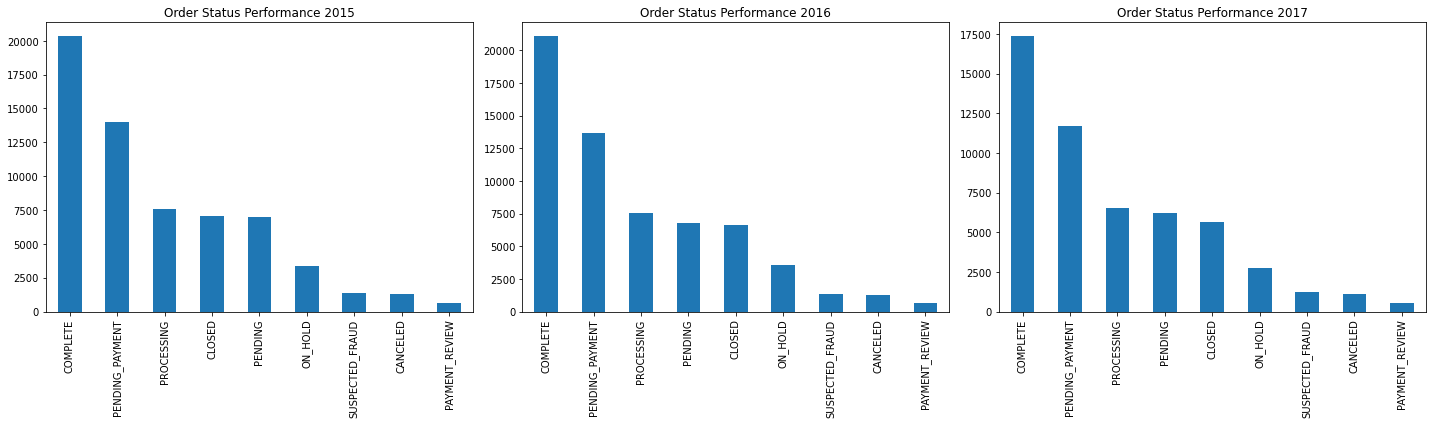

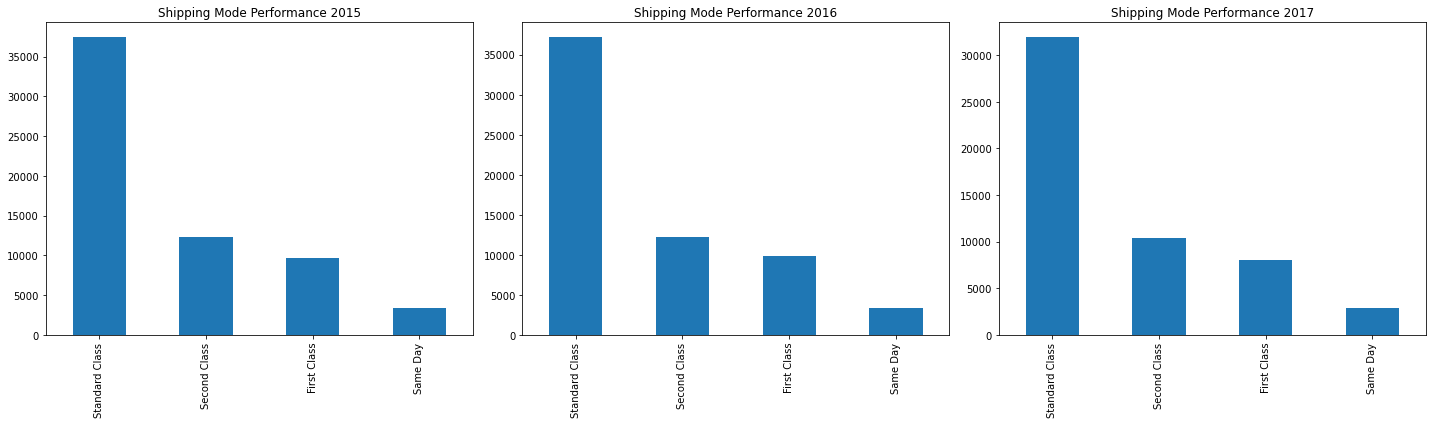

In [66]:
# define the list of years and columns
years = ['2015', '2016', '2017'] #its quoted because previously I changed the data into 'str'
columns = ['Type', 'Delivery Status', 'Customer Segment', 'Market', 'Order Status', 'Shipping Mode']

# define the function to generate the plots
def plot_performance(df, column, year):
    # create a figure with three subplots
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

    # loop over the years
    for i, year in enumerate(years):
        # plot the data for the given column
        df[df['Order Year'] == year][column].value_counts().plot(kind='bar', ax=ax[i])
        ax[i].set_title(f"{column} Performance {year}")

    # adjust the layout
    plt.tight_layout()

# loop over the years and columns
for column in columns:
    plot_performance(df, column, year)

In [67]:
delivery_status = df.groupby(by=['Order Year', 'Delivery Status']).count()['Type'].reset_index()
delivery_status['total'] = delivery_status.groupby('Order Year')['Type'].transform('sum')
delivery_status['Performance%'] = round((delivery_status['Type'] / delivery_status['total'] * 100), 2)
delivery_status

,Order Year,Delivery Status,Type,total,Performance%
0,2015,Advance shipping,14597,62650,23.30
1,2015,Late delivery,34372,62650,54.86
2,2015,Shipping canceled,2696,62650,4.30
3,2015,Shipping on time,10985,62650,17.53
4,2016,Advance shipping,14199,62550,22.70
5,2016,Late delivery,34446,62550,55.07
6,2016,Shipping canceled,2624,62550,4.20
7,2016,Shipping on time,11281,62550,18.04
8,2017,Advance shipping,12328,53196,23.17
9,2017,Late delivery,28964,53196,54.45


**To summarize**

- Over the years, Late Delivery has consistently been the most common delivery status. This suggests that there may be issues with our supply chain system. It would be worth reviewing any standard KPI metrics related to the supply chain to understand why this trend has been persistent. More than 50% of orders have been delivered late over the years, while less than 20% have been delivered on time.
- Most of our orders come from individual customers (B2C), followed by corporate or business-to-business (B2B) and home office orders. This indicates that our on-demand service is performing well, but it would be worth reviewing our digital marketing tools to identify areas for improvement.
- Our market has changed over the years, with Latin America (LATAM) being the most successful region in 2015, the United States and Canada (USCA) being the most successful in 2016, and LATAM once again being the most successful in 2017. We can also see that the market size has grown over the years, with orders coming from three regions in 2015, four regions in 2016, and five regions in 2017.
- The most common order status has been "complete", followed by "pending_payment" and "payment_review". It would be worth checking with the finance team to understand why there are a significant number of orders in the "pending_payment" and "payment_review" categories and how we can improve this. Other common order statuses include "processing", "pending", and "on hold", which may be worth discussing with the operational/supply chain team. A small number of orders have been classified as "suspected fraud", which we should review with our IT team to prevent similar occurrences in the future.
- Standard Class has been the most popular shipping mode among our customers.
- Debit has consistently been the most popular payment method year-over-year, followed by Transfer, Payment, and Cash.

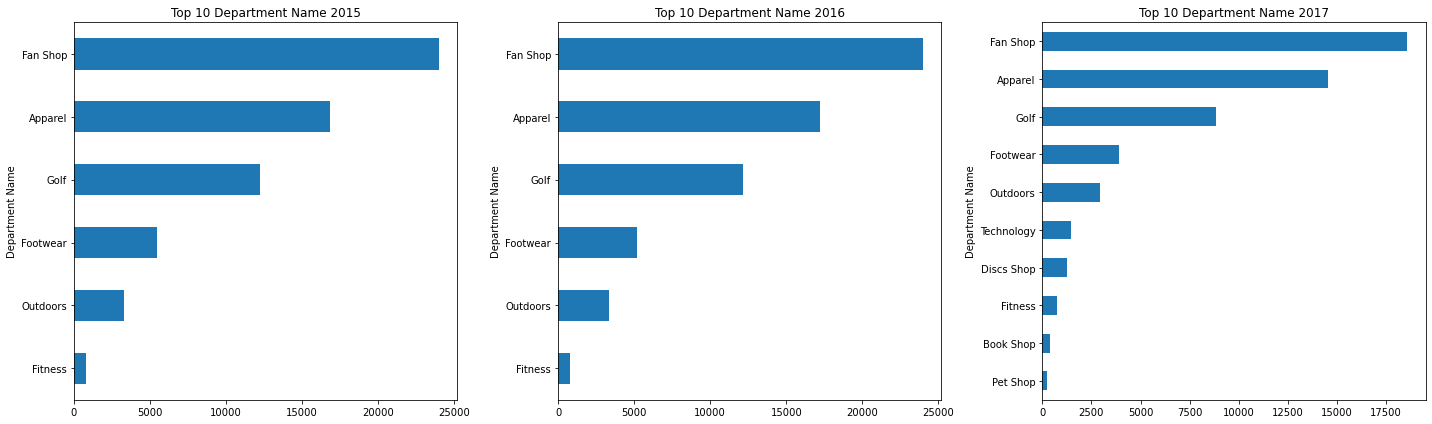

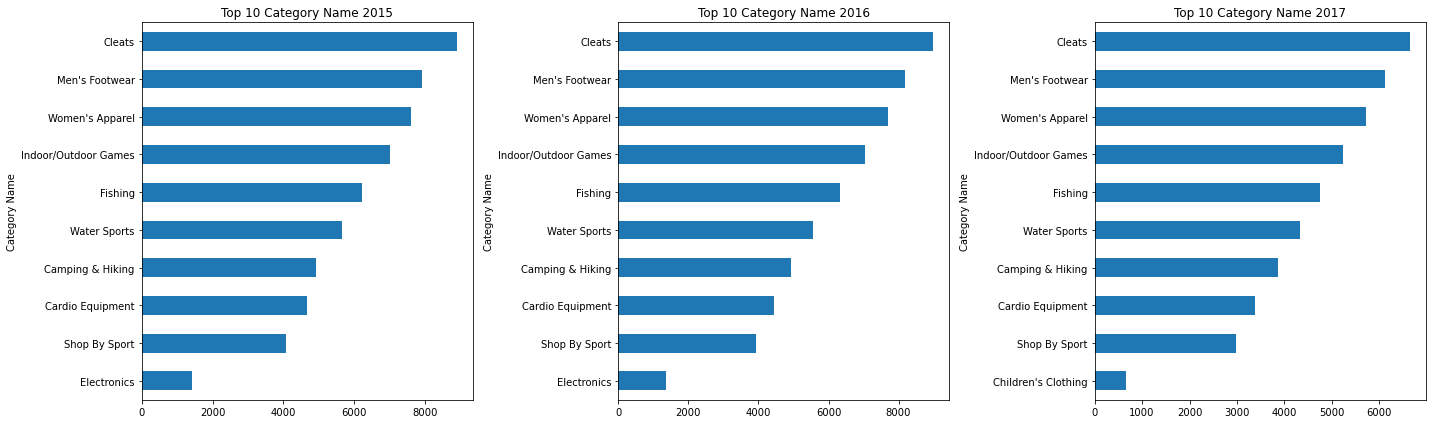

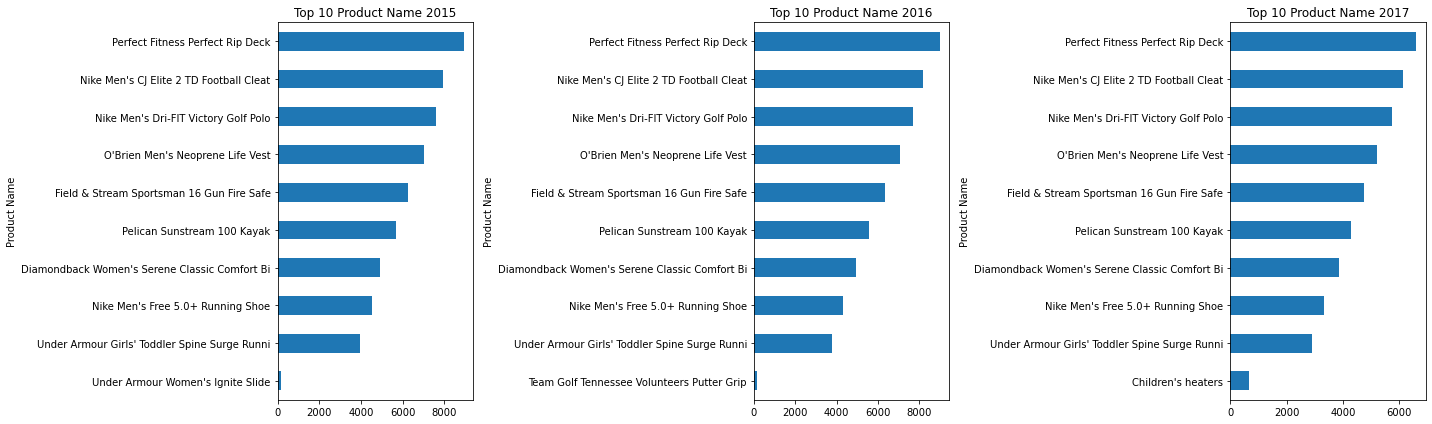

In [69]:
# define the list of years and columns
years = ['2015', '2016', '2017']
products = ['Department Name', 'Category Name', 'Product Name']

# define the function to generate the plots
def plot_performance(df, column, year):
    # create a figure with three subplots
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

    # loop over the years
    for i, year in enumerate(years):
        # plot the data for the given column
        df[df['Order Year'] == year].groupby(by=[column])[column].count().sort_values().tail(10).plot.barh(ax=ax[i])
        ax[i].set_title(f"Top 10 {column} {year}")

    # adjust the layout
    plt.tight_layout()

# loop over the years and columns
for column in products:
    # generate the plots
    plot_performance(df, column, year)

**To summarize**
- The top 5 department names have remained consistent over the years, but the positions of the 6th to 10th ranked departments have changed. We can also see that the number of departments has increased over the years.
- Over the years, the top 9 category names and product names have remained consistent, with only the 10th ranked name changing.

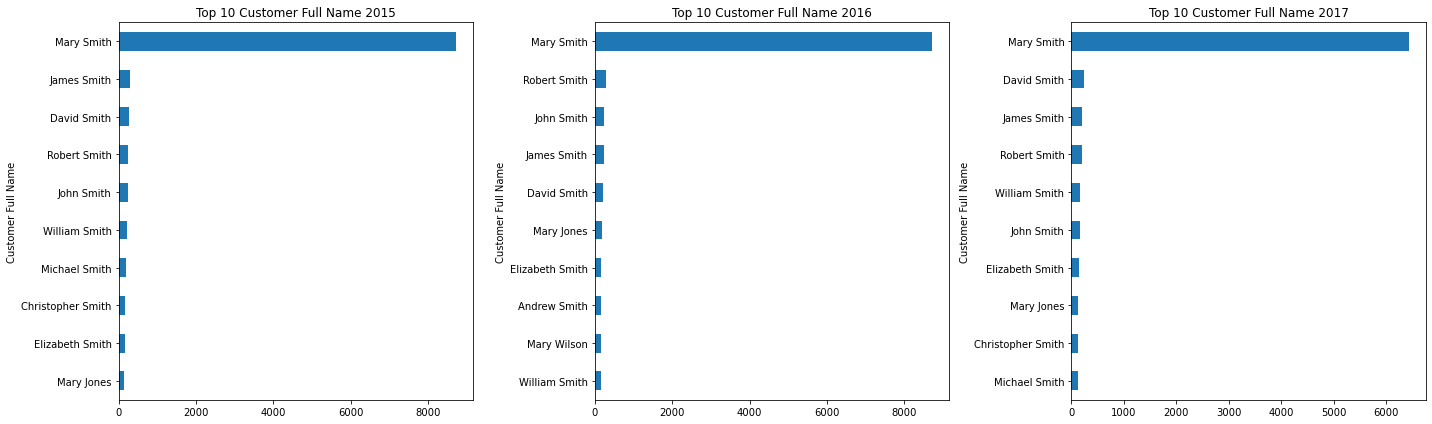

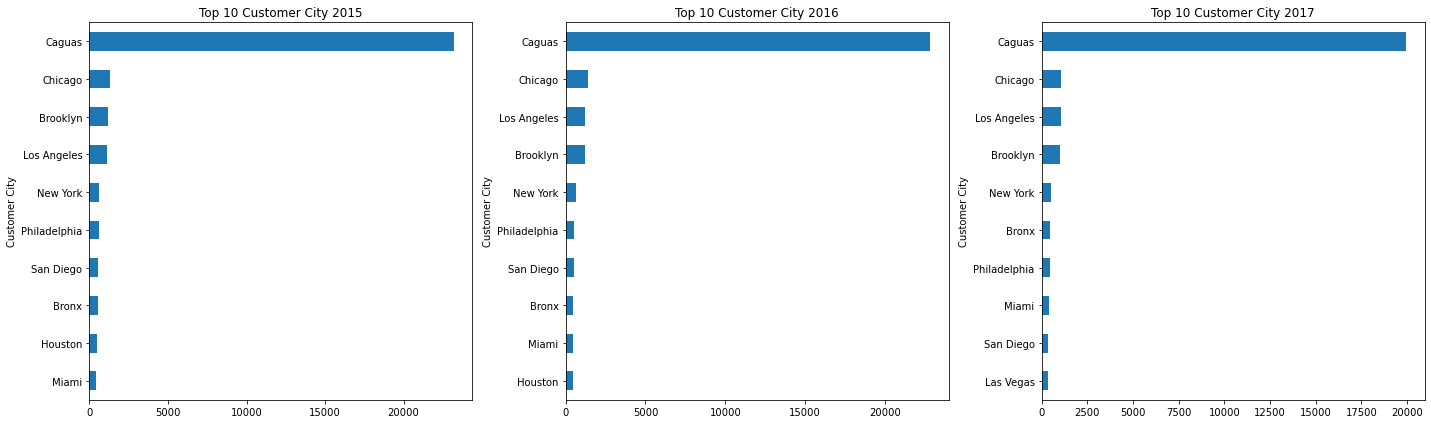

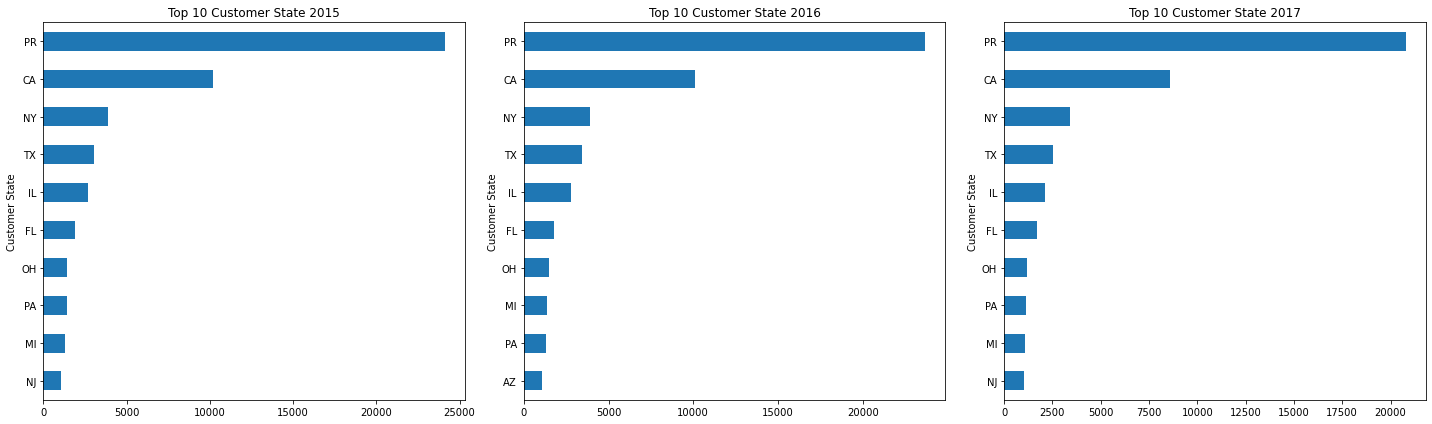

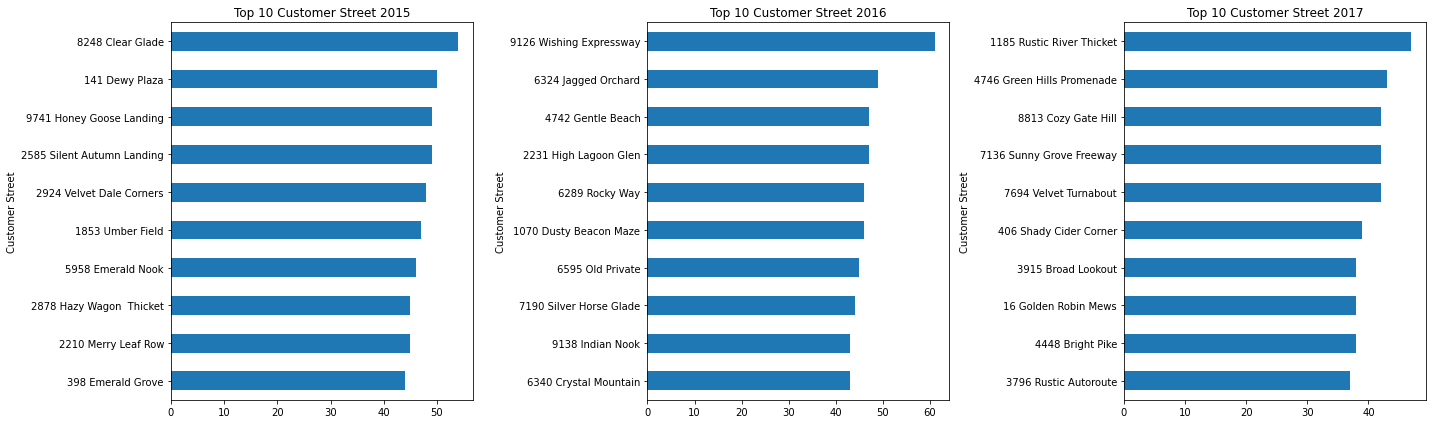

In [70]:
# define the list of years and columns
years = ['2015', '2016', '2017']
products = ['Customer Full Name', 'Customer City', 'Customer State', 'Customer Street']

# define the function to generate the plots
def plot_delivery_performance(df, column, year):
    # create a figure with three subplots
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

    # loop over the years
    for i, year in enumerate(years):
        # plot the data for the given column
        df[df['Order Year'] == year].groupby(by=[column])[column].count().sort_values().tail(10).plot.barh(ax=ax[i])
        ax[i].set_title(f"Top 10 {column} {year}")

    # adjust the layout
    plt.tight_layout()

# loop over the years and columns
for column in products:
    # generate the plots
    plot_delivery_performance(df, column, year)

In [75]:
cust_city = df.groupby(by=['Order Year', 'Customer City']).count()['Type'].reset_index()
cust_city['total'] = cust_city.groupby('Order Year')['Type'].transform('sum')
cust_city['Performance%'] = round((cust_city['Type'] / cust_city['total'] * 100), 2)
top_cities = cust_city.sort_values(by='Performance%', ascending=False).groupby('Order Year').head(10)
top_cities

,Order Year,Customer City,Type,total,Performance%
1190,2017,Caguas,19954,53196,37.51
65,2015,Caguas,23217,62650,37.06
627,2016,Caguas,22817,62550,36.48
649,2016,Chicago,1431,62550,2.29
87,2015,Chicago,1333,62650,2.13
1212,2017,Chicago,1088,53196,2.05
846,2016,Los Angeles,1241,62550,1.98
1409,2017,Los Angeles,1046,53196,1.97
621,2016,Brooklyn,1193,62550,1.91
1183,2017,Brooklyn,1016,53196,1.91


**To summarize**
- The Top 10 customer are changing over the year, but there's some name that is consistent in Top 10. But, we acknowledge that same name doesn't inherently a same person, we have to make sure this first by making a cohort amalysis to analyse the churn rate by CustomerID
- Top Customer City over the year is Caguas


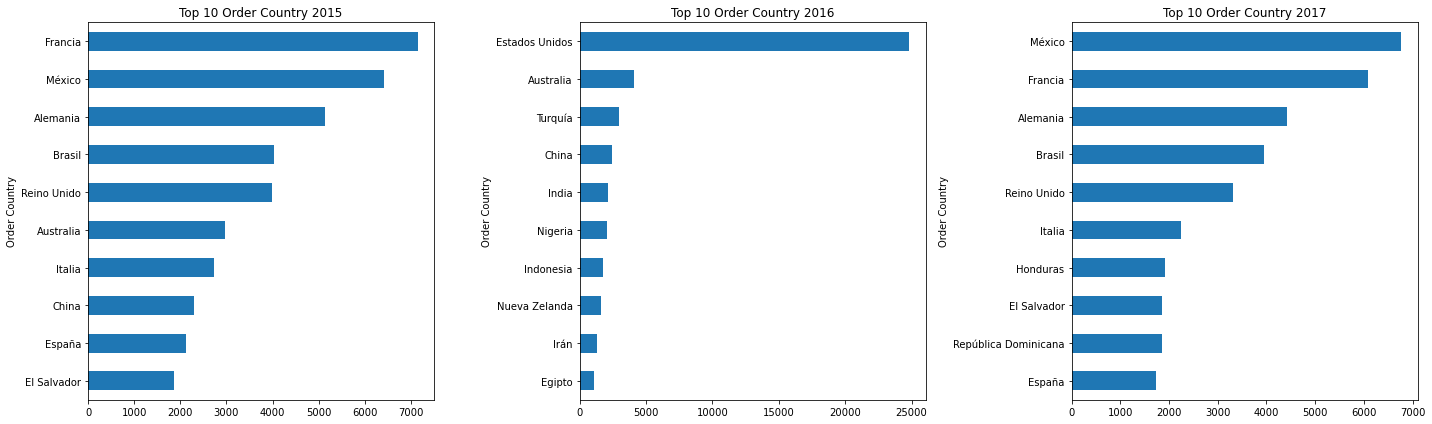

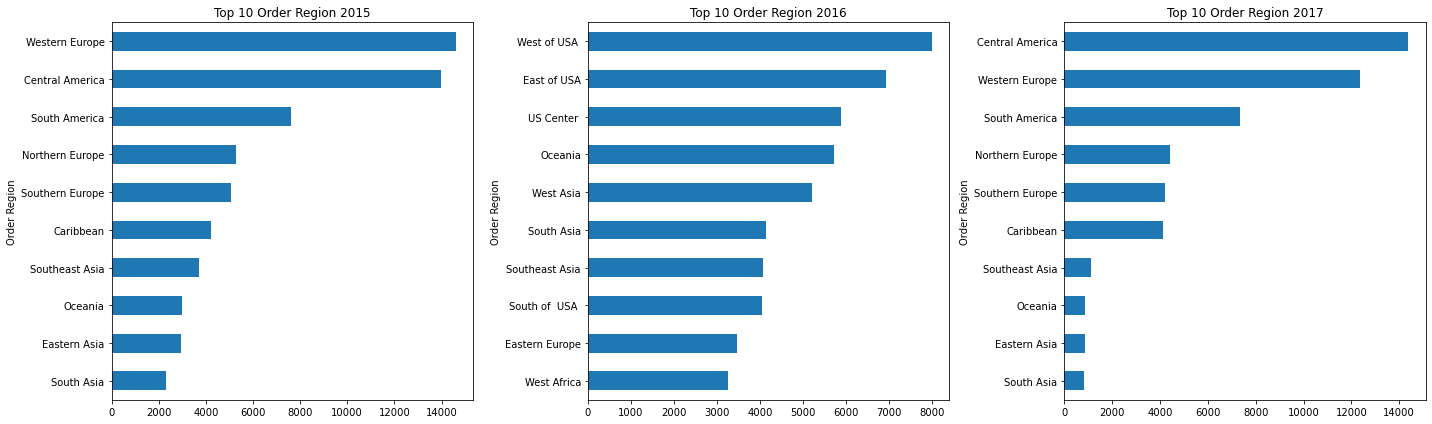

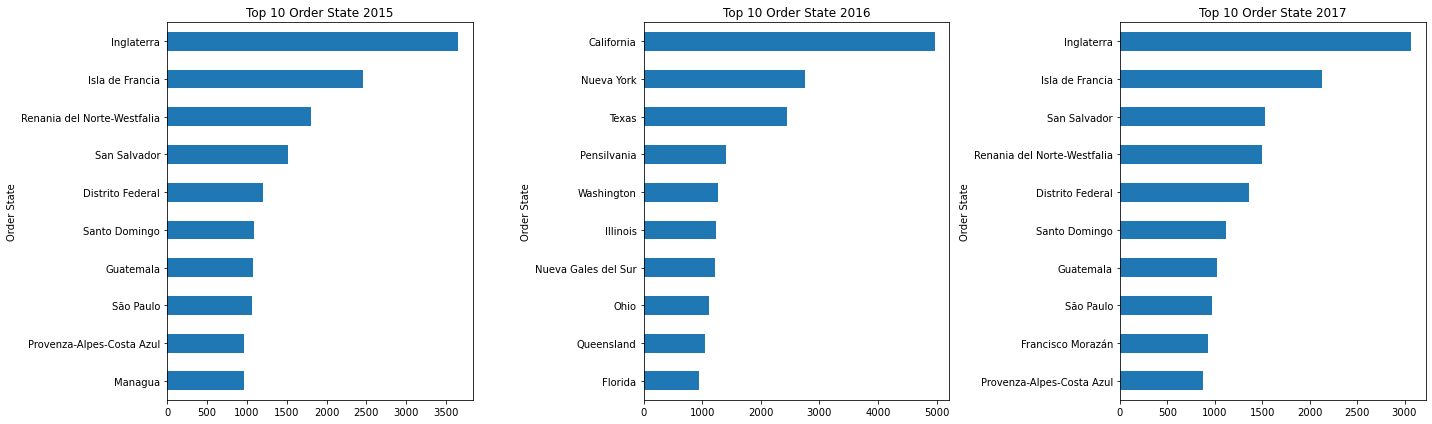

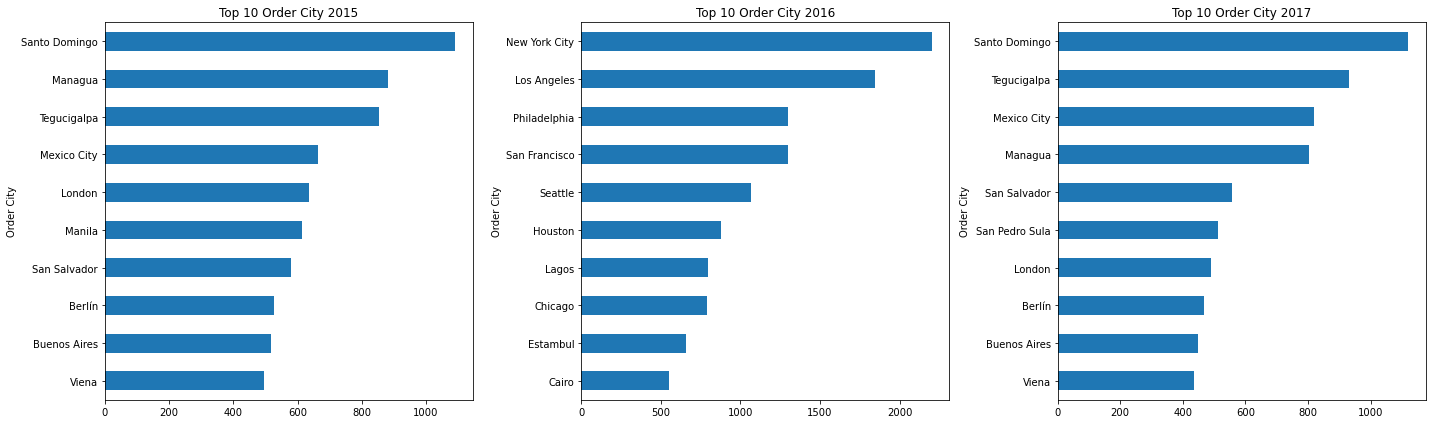

In [72]:
# define the list of years and columns
years = ['2015', '2016', '2017']
order = ['Order Country', 'Order Region', 'Order State', 'Order City']

# define the function to generate the plots
def plot_performance(df, column, year):
    # create a figure with three subplots
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

    # loop over the years
    for i, year in enumerate(years):
        # plot the data for the given column
        df[df['Order Year'] == year].groupby(by=[column])[column].count().sort_values().tail(10).plot.barh(ax=ax[i])
        ax[i].set_title(f"Top 10 {column} {year}")

    # adjust the layout
    plt.tight_layout()

# loop over the years and columns
for column in order:
    # generate the plots
    plot_performance(df, column, year)

**To summarize**
- Over the years, the top 10 countries, states, and cities for orders have been constantly changing, with no single country appearing in the top 10 for every year. For order regions, only Oceania and South Asia have consistently remained in the top 10. This indicates that our geo-segmentation is evolving over time.

### Numbers

In [74]:
#so we are about to describe all the column with 'int' type, so we correct the columns that shouldn't be in 'int'
df[['Department Id','Customer Id','Category Id',
    'Order Id','Order Item Cardprod Id', 
    'Product Card Id','Product Category Id',
    'Order Customer Id', 'Order Item Id']] = df[['Department Id','Customer Id','Category Id',
                                            'Order Id','Order Item Cardprod Id', 
                                            'Product Card Id','Product Category Id',
                                            'Order Customer Id', 'Order Item Id']].astype(str)

In [81]:
#choose to drop Customer and Order Zipcode column because instead of ZIPCODE, I will use the Lat and Lng to perform the analysis
df = df.drop(columns=['Customer Zipcode', 'Order Zipcode'])

In [79]:
#to perform the geo-mapping, Lat and Lng should be in 'str'
df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].astype(str)

In [76]:
#change the columns that should be in 'boolean'
df[['Late_delivery_risk','Product Status']] = df[['Late_delivery_risk','Product Status']].astype('bool')

In [83]:
#order quarter should be in 'str'
df['Order Quarter'] = df['Order Quarter'].astype('str')

In [84]:
df.describe().round(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price
count,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00
mean,3.50,2.93,22.05,183.62,20.72,0.10,141.05,0.12,2.14,204.34,183.62,22.05,141.05
std,1.62,1.37,104.64,119.89,21.81,0.07,139.74,0.47,1.46,132.10,119.89,104.64,139.74
min,0.00,0.00,-4274.98,7.49,0.00,0.00,9.99,-2.75,1.00,9.99,7.49,-4274.98,9.99
25%,2.00,2.00,7.20,105.58,5.50,0.04,50.00,0.08,1.00,119.98,105.58,7.20,50.00
50%,3.00,4.00,31.79,163.99,14.30,0.09,59.99,0.27,1.00,199.92,163.99,31.79,59.99
75%,5.00,4.00,64.90,247.50,30.00,0.16,199.99,0.36,3.00,299.95,247.50,64.90,199.99
max,6.00,4.00,911.80,1939.99,500.00,0.25,1999.99,0.50,5.00,1999.99,1939.99,911.80,1999.99


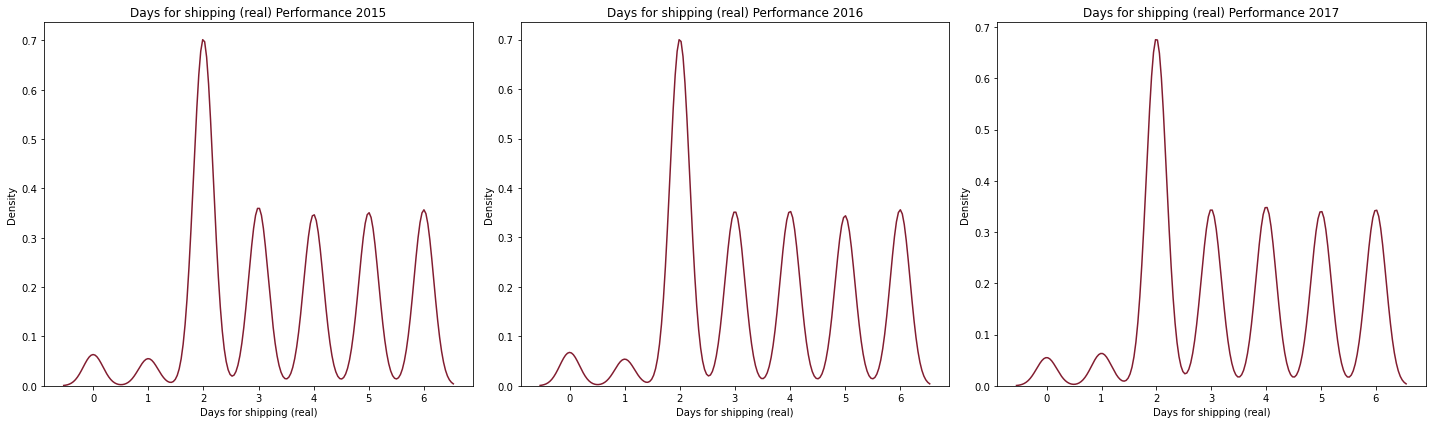

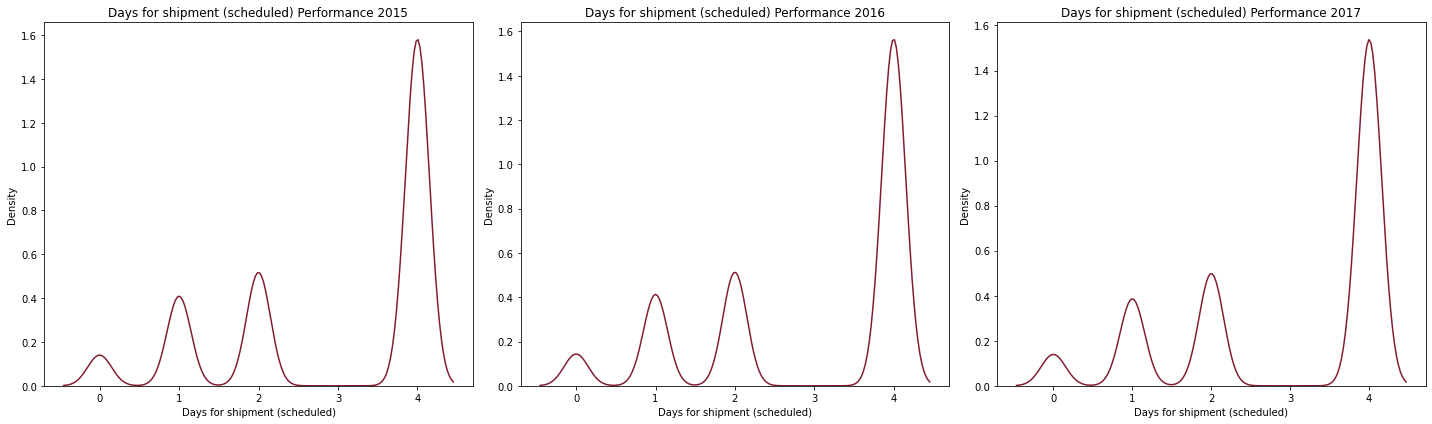

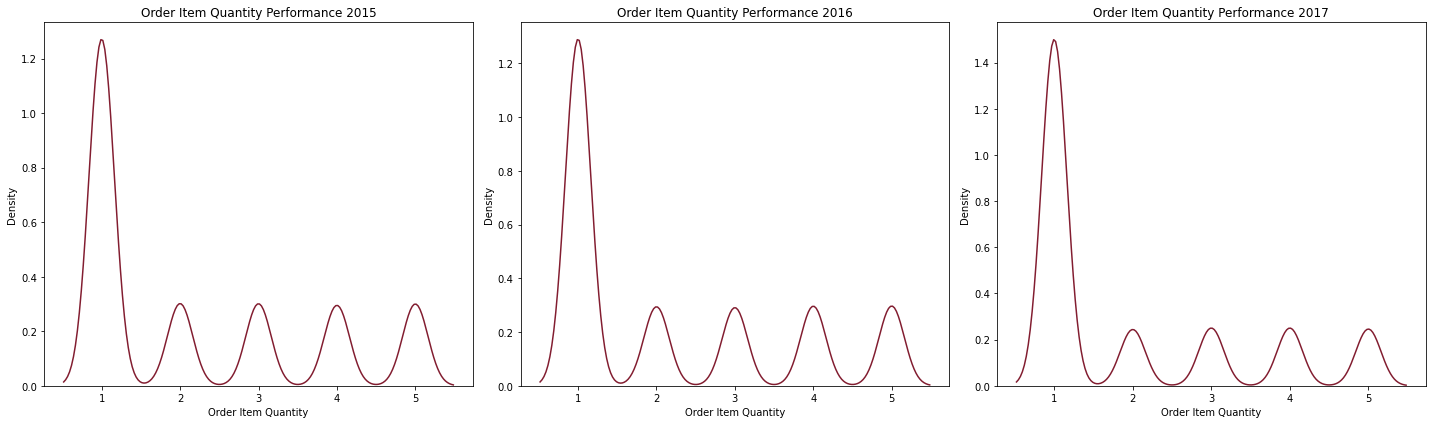

In [102]:
# define the list of years and columns
years = ['2015', '2016', '2017']
integers = df.select_dtypes('int').columns

# define the function to generate the plots
def plot_performance(df, column, year):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))  

    # loop over the years
    for i, year in enumerate(years):
        # plot the data for the given column
        sns.kdeplot(data=df[df['Order Year'] == year], x=column, color='#821D30', ax=ax[i])
        ax[i].set_title(f"{column} Performance {year}")

    # adjust the layout
    plt.tight_layout()

# loop over the years and columns
for column in integers:
    # generate the plots
    plot_performance(df, column, year)

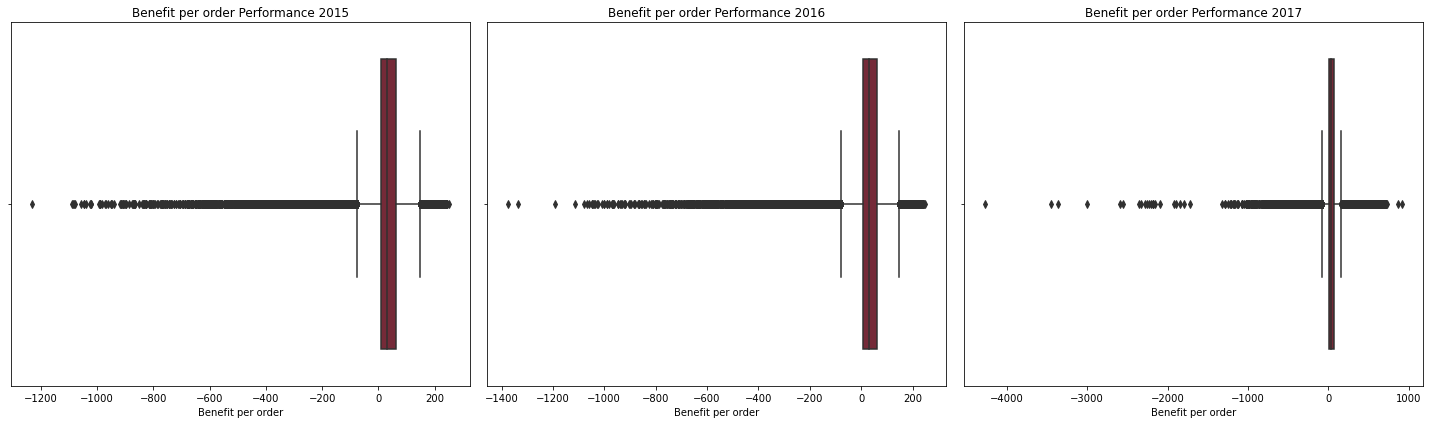

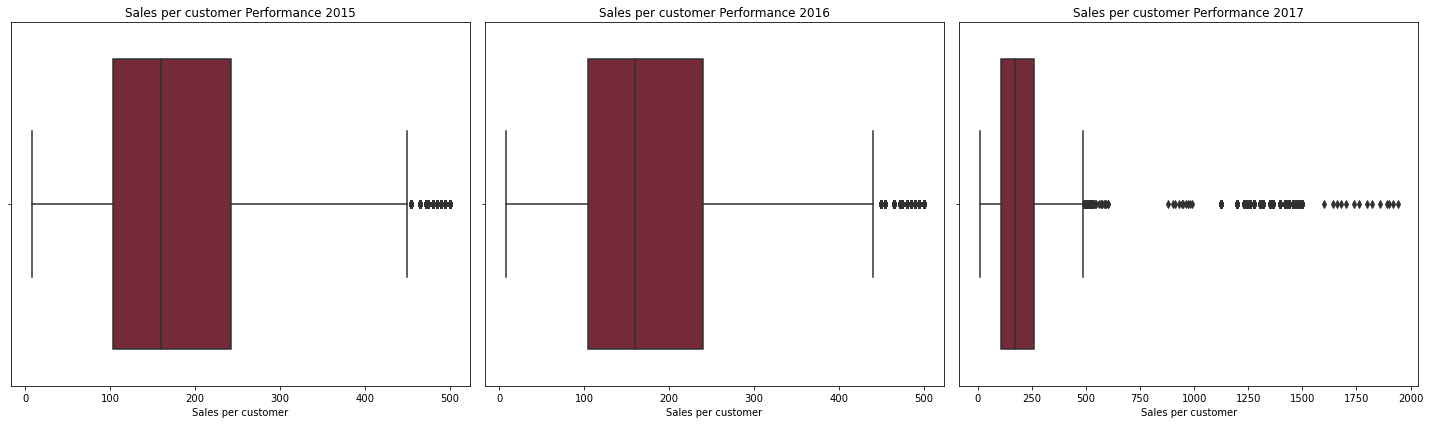

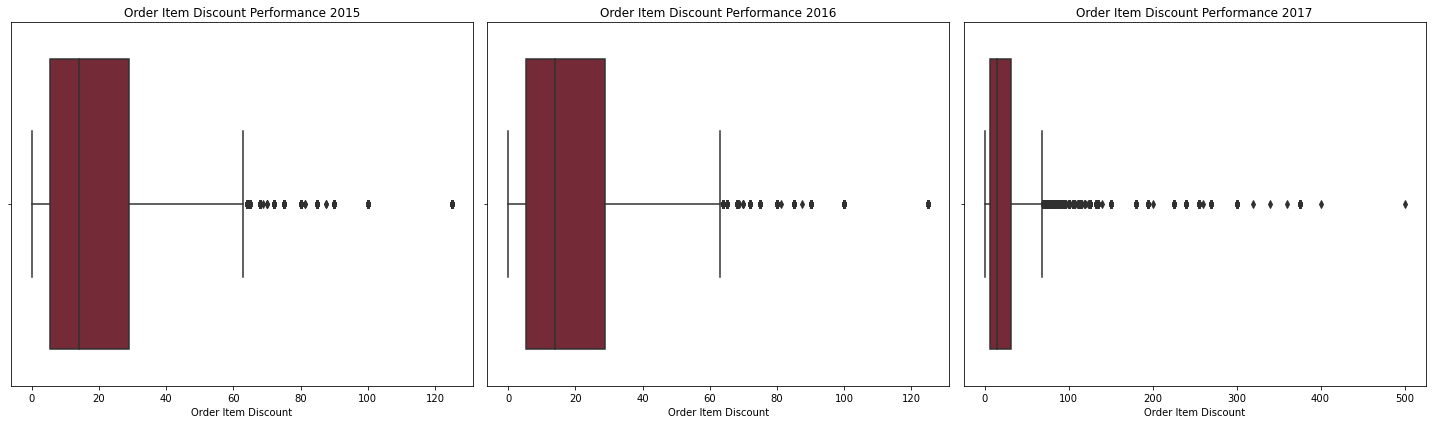

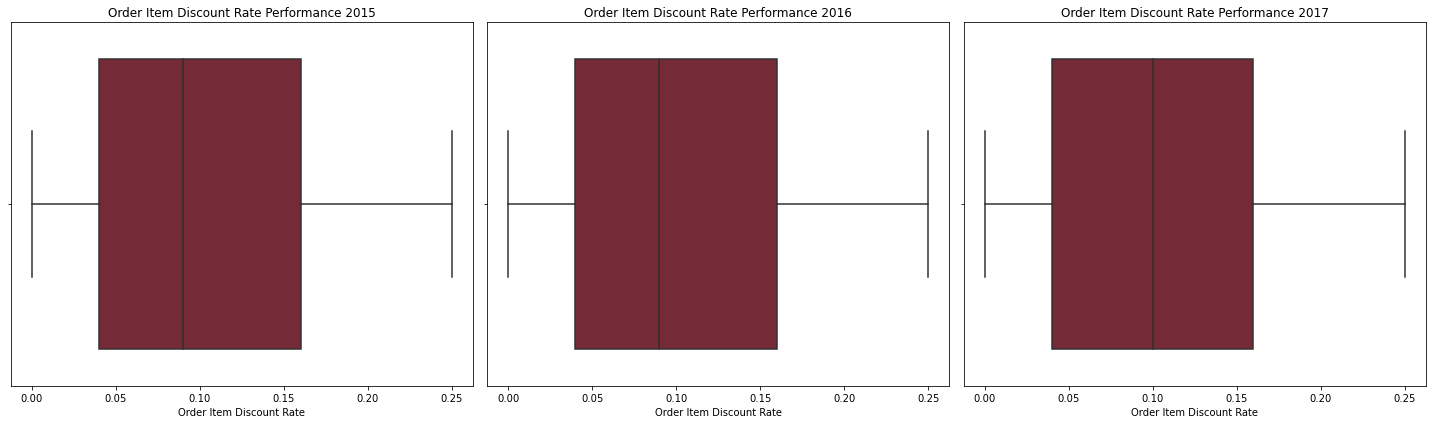

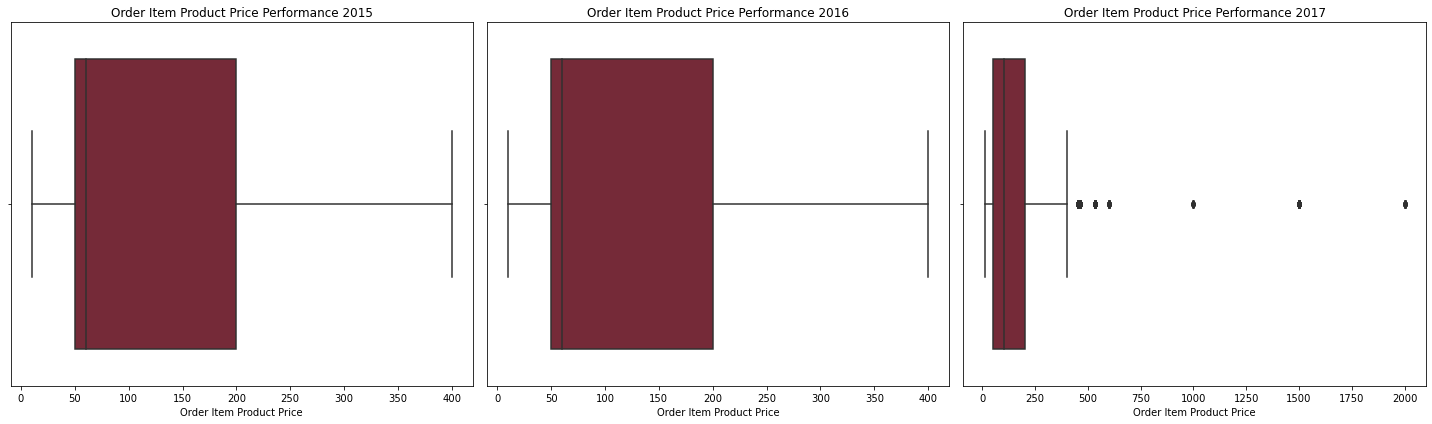

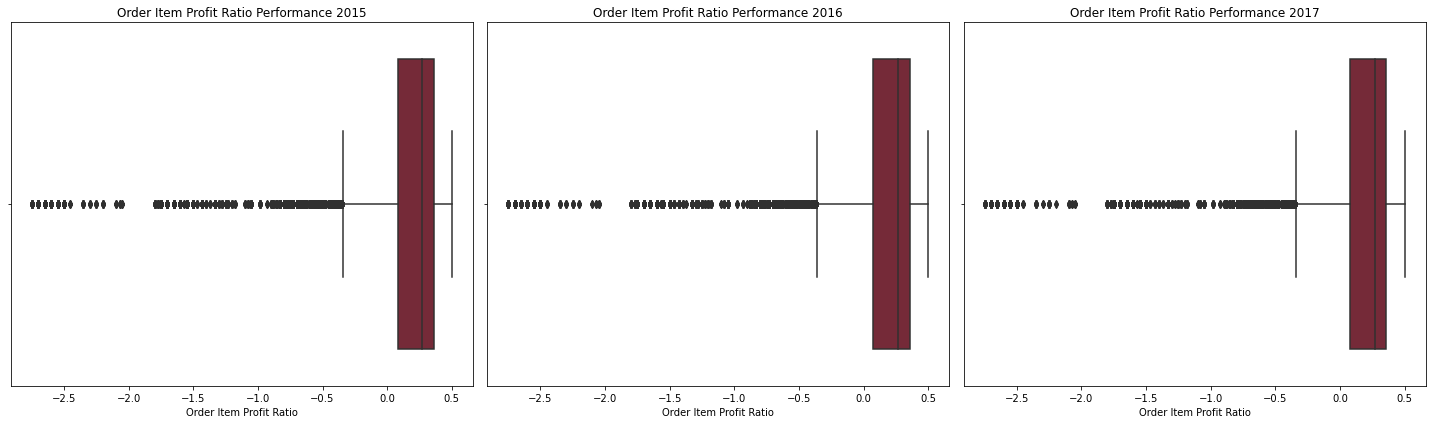

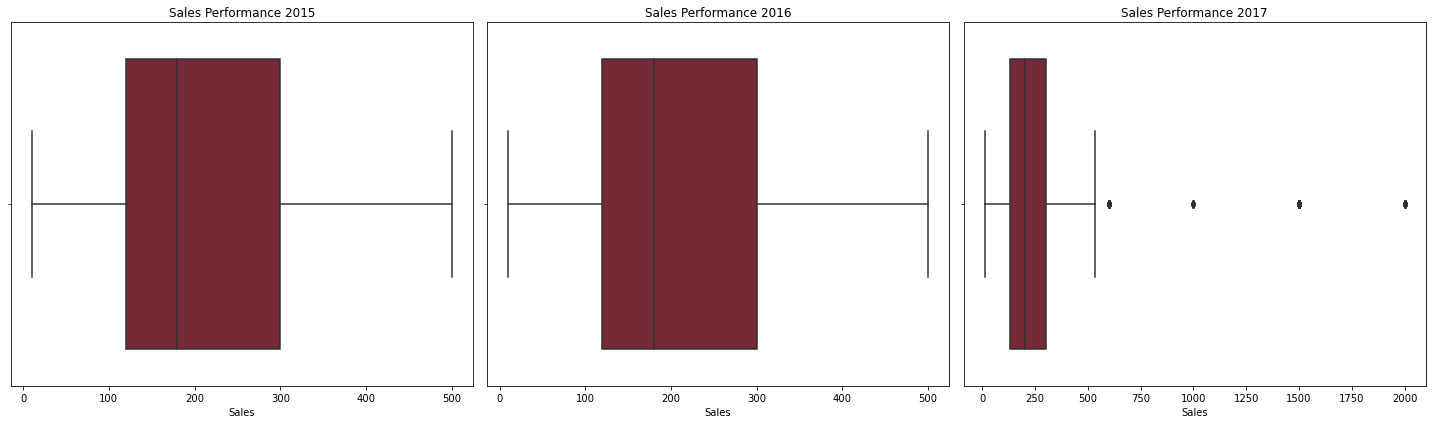

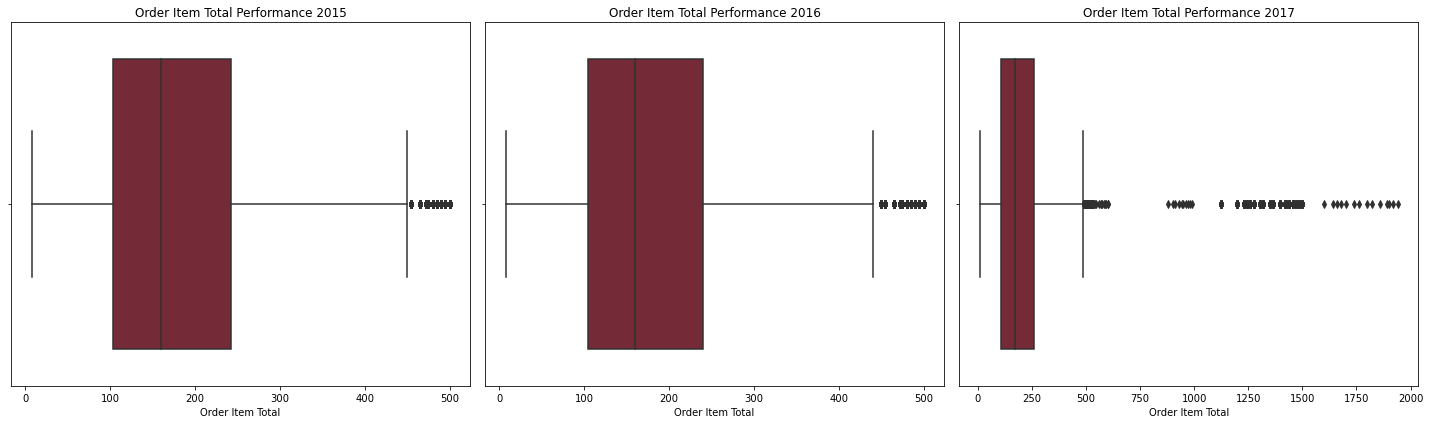

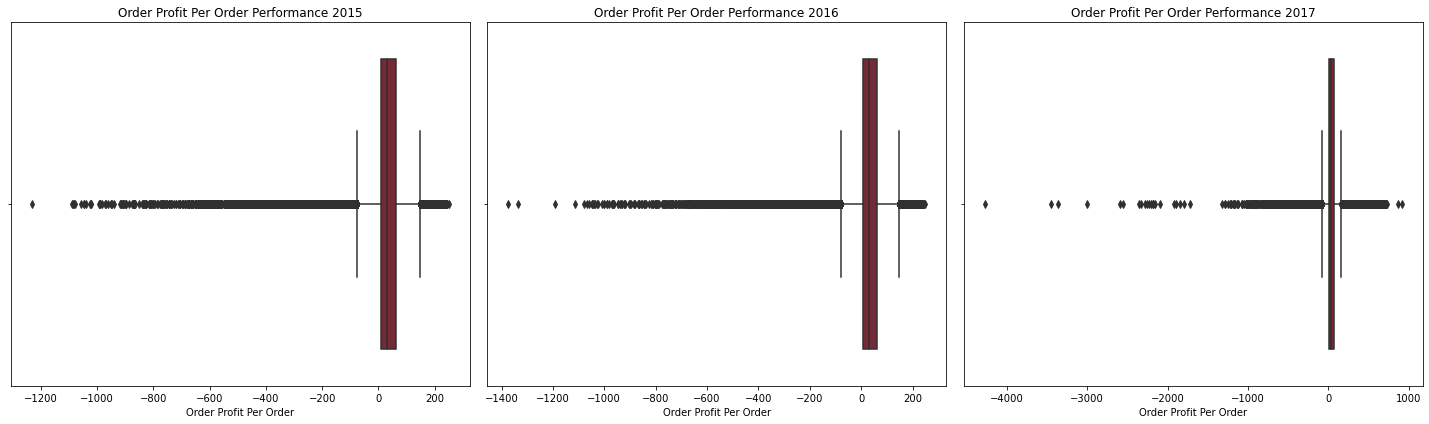

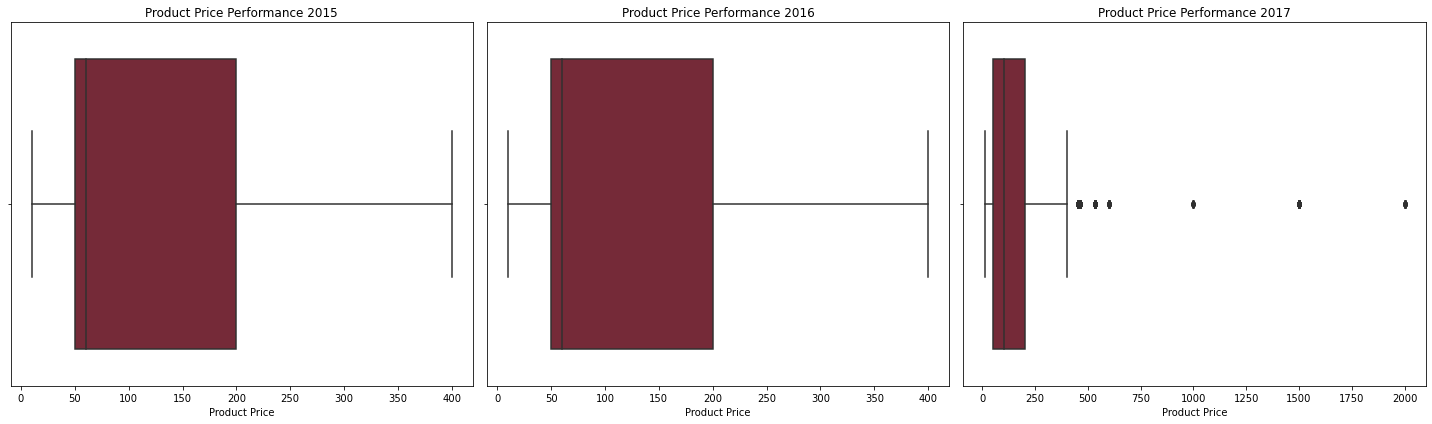

In [122]:
# define the list of years and columns
years = ['2015', '2016', '2017']
floats = df.select_dtypes('float64').columns

# define the function to generate the plots
def plot_performance(df, column, year):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))  

    # loop over the years
    for i, year in enumerate(years):
        # plot the data for the given column
        sns.boxplot(data=df[df['Order Year'] == year], x=column, color='#821D30', ax=ax[i])
        ax[i].set_title(f"{column} Performance {year}")

    # adjust the layout
    plt.tight_layout()

# loop over the years and columns
for column in floats:
    # generate the plots
    plot_performance(df, column, year)

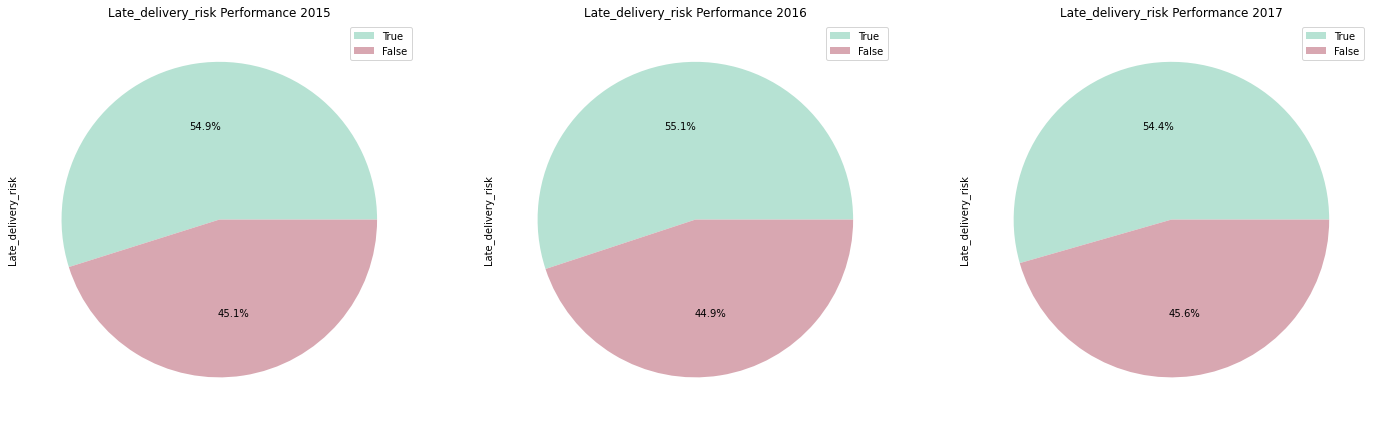

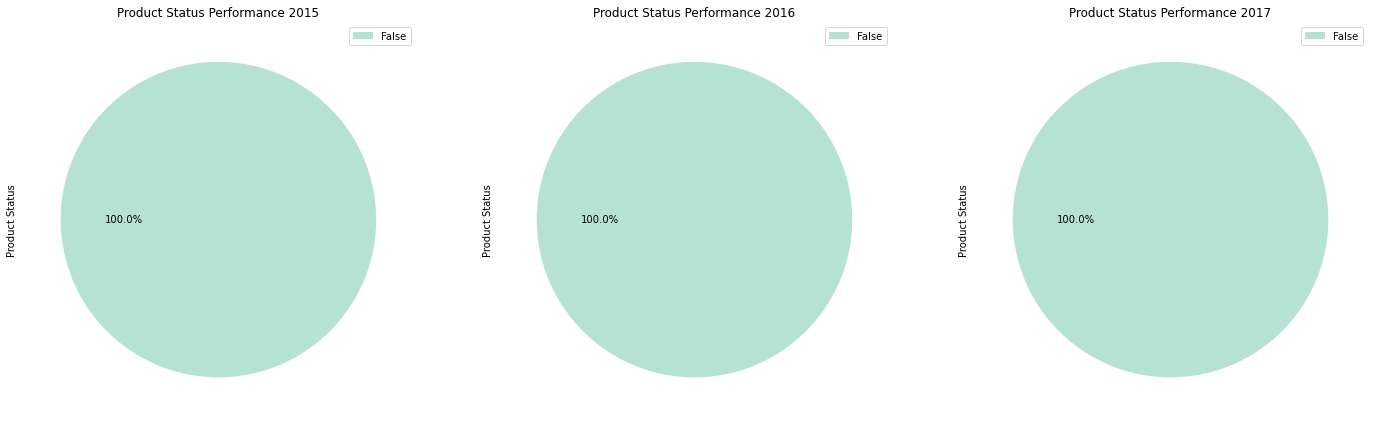

In [118]:
# define the list of years and columns
years = ['2015', '2016', '2017']
floats = df.select_dtypes('bool').columns

# define the function to generate the plots
def plot_performance(df, column, year):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))  

    # loop over the years
    for i, year in enumerate(years):
        # plot the data for the given column
        df[df['Order Year'] == year][column].value_counts(
        ).plot.pie(autopct='%1.1f%%', labels=None, legend=True, colors=['#B6E2D3','#D8A7B1'], ax=ax[i])
        ax[i].set_title(f"{column} Performance {year}")

    # adjust the layout
    plt.tight_layout()

# loop over the years and columns
for column in floats:
    # generate the plots
    plot_performance(df, column, year)